In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Downloads/events_log.csv.gz',  compression='gzip',
                   error_bad_lines=False)

In [3]:
data.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [4]:
data.dtypes

uuid                object
timestamp          float64
session_id          object
group               object
action              object
checkin            float64
page_id             object
n_results          float64
result_position    float64
dtype: object

In [5]:
import datetime as dt
data['timestamp'] = pd.to_datetime(data['timestamp'].astype(str).str[:14],format='%Y%m%d%H%M%S')

In [6]:
pd.isnull(data).sum()

uuid                    0
timestamp               0
session_id              0
group                   0
action                  0
checkin            176341
page_id                 0
n_results          263931
result_position    169683
dtype: int64

In [7]:
## Page opened most for 10 seconds
data['day'] = data['timestamp'].dt.weekday_name

In [8]:
data['group'].value_counts()

a    299019
b    101146
Name: group, dtype: int64

In [10]:
#data['n_results'].value_counts()


In [12]:
data['action'].value_counts()

checkin             223824
searchResultPage    136234
visitPage            40107
Name: action, dtype: int64

In [13]:
data[data['action'] == 'checkin']['checkin']

2          30.0
3          60.0
4          30.0
5         180.0
6         240.0
8         180.0
9         150.0
11         30.0
13         10.0
14         30.0
15         10.0
18         20.0
19         50.0
20         10.0
25         20.0
26         10.0
27         90.0
28        150.0
33         40.0
35         20.0
37         20.0
40        240.0
41         50.0
42         50.0
44         30.0
45         30.0
46        180.0
49        120.0
52         20.0
53         90.0
          ...  
400113     60.0
400114    300.0
400116     60.0
400117     40.0
400118     40.0
400120    120.0
400121     50.0
400122     40.0
400128    120.0
400129    300.0
400132     30.0
400133     30.0
400135     20.0
400137    180.0
400138    120.0
400139     10.0
400140    150.0
400142     30.0
400143     60.0
400145     90.0
400147    120.0
400152    180.0
400153     40.0
400154     30.0
400156     10.0
400157     60.0
400159    240.0
400160    120.0
400161     10.0
400164     30.0
Name: checkin, Length: 2

In [14]:
data[data['action'] == 'searchResultPage']['n_results'].sort_values()

145936      0.0
105401      0.0
175525      0.0
53881       0.0
368852      0.0
213517      0.0
105421      0.0
53869       0.0
298510      0.0
175501      0.0
53858       0.0
53852       0.0
368861      0.0
213534      0.0
276687      0.0
298537      0.0
53821       0.0
276668      0.0
339107      0.0
105429      0.0
105430      0.0
105432      0.0
53892       0.0
53899       0.0
213512      0.0
53909       0.0
105341      0.0
53982       0.0
175581      0.0
368807      0.0
          ...  
341372    500.0
108290    500.0
98120     500.0
209215    500.0
374678    500.0
310347    500.0
371855    500.0
201060    500.0
363734    500.0
253177    500.0
317437    500.0
273262    500.0
18600     500.0
281161    500.0
188327    500.0
267873    500.0
360718    500.0
197557    500.0
332339    500.0
309243    500.0
220286    500.0
194039    500.0
42946     500.0
141664    500.0
255027    500.0
42877     500.0
26299     500.0
70135     500.0
279855    500.0
226793    500.0
Name: n_results, Length:

In [15]:
## to see if the column n_result has all values corresponding to 'searchResultPage'
data[data['n_results'].notnull()]['action'] == 'searchResultPage'

0         True
1         True
7         True
10        True
12        True
16        True
17        True
22        True
23        True
24        True
30        True
31        True
32        True
34        True
36        True
38        True
39        True
43        True
47        True
48        True
50        True
51        True
54        True
55        True
60        True
64        True
65        True
66        True
68        True
73        True
          ... 
400059    True
400063    True
400073    True
400074    True
400082    True
400085    True
400089    True
400091    True
400095    True
400098    True
400102    True
400103    True
400115    True
400119    True
400123    True
400125    True
400127    True
400130    True
400131    True
400134    True
400136    True
400144    True
400146    True
400148    True
400150    True
400151    True
400155    True
400158    True
400162    True
400163    True
Name: action, Length: 136234, dtype: bool

In [16]:
## to see if the column checkin has all values corresponding to 'checkin' category 
all(data[data['checkin'].notnull()]['action'] == 'checkin')

True

In [17]:
## to see if the column result_position has all values corresponding to 'checkin'
## four values corresponds to visitpage
all(data[data['result_position'].notnull()]['action'] == 'checkin')

False

In [18]:
data['date'] = data['timestamp'].dt.date

In [19]:
data['action'].value_counts()

checkin             223824
searchResultPage    136234
visitPage            40107
Name: action, dtype: int64

## 1. What is their daily overall click through rate? How does it vary between the groups?

In [23]:
session_summary = data[data['n_results'] != 0].groupby(['date','group', 'session_id', 'action']).size().unstack()
session_summary.head()

action                             checkin  searchResultPage  visitPage
date       group session_id                                            
2016-03-01 a     001a3950cd4ac6c6      NaN               1.0        NaN
                 0024c4506bf92e1c     23.0               2.0        2.0
                 0024f4f005f34c9d      NaN               3.0        NaN
                 0029420a5f8c7d90      NaN               3.0        1.0
                 002b97995ca9ce77      2.0               3.0        2.0

In [24]:
is_click_session = pd.DataFrame(session_summary['visitPage'].map(lambda x : 1 if x >= 1 else 0)).reset_index()
is_click_session.head()

,date,group,session_id,visitPage
0,2016-03-01,a,001a3950cd4ac6c6,0
1,2016-03-01,a,0024c4506bf92e1c,1
2,2016-03-01,a,0024f4f005f34c9d,0
3,2016-03-01,a,0029420a5f8c7d90,1
4,2016-03-01,a,002b97995ca9ce77,1


In [26]:
is_click_session.groupby('date')['visitPage'].mean()


date
2016-03-01    0.431018
2016-03-02    0.441097
2016-03-03    0.436237
2016-03-04    0.447089
2016-03-05    0.437957
2016-03-06    0.443382
2016-03-07    0.442960
2016-03-08    0.440454
Name: visitPage, dtype: float64

In [27]:
is_click_session.groupby(['date', 'group'])['visitPage'].mean()

date        group
2016-03-01  a        0.708731
            b        0.166826
2016-03-02  a        0.714783
            b        0.175078
2016-03-03  a        0.707287
            b        0.182242
2016-03-04  a        0.706968
            b        0.228593
2016-03-05  a        0.681344
            b        0.246196
2016-03-06  a        0.710827
            b        0.229570
2016-03-07  a        0.691564
            b        0.237365
2016-03-08  a        0.699569
            b        0.223111
Name: visitPage, dtype: float64

## 2.Which result position do people tend to try first? How does it change day-to-day?

In [28]:
result_pos_df = pd.DataFrame(data.groupby(['date', 'session_id'])['n_results'].size().sort_values().reset_index())

In [29]:
result_pos_df['n_results'].value_counts().reset_index().head()

,index,n_results
0,1,27628
1,2,8797
2,3,5281
3,17,3428
4,4,3190


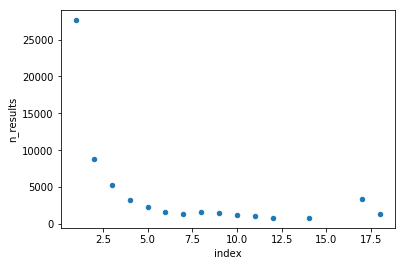

In [30]:
result_pos_df['n_results'].value_counts().reset_index().head(15).plot(x = 'index', y = 'n_results', kind = 'scatter')

In [31]:
d= pd.DataFrame(data.groupby(['date', 'session_id', 'day'])['n_results'].size().sort_values().reset_index())
d.head()

,date,session_id,day,n_results
0,2016-03-01,000936ae06d62383,Tuesday,1
1,2016-03-04,f97c05f2ce4db3db,Friday,1
2,2016-03-04,f984f7904e88d5c9,Friday,1
3,2016-03-04,f99012ff69acc624,Friday,1
4,2016-03-04,f99d48c811a8429e,Friday,1


Text(0.5,1,'Dailywise Variation in First Result Selection by user ')

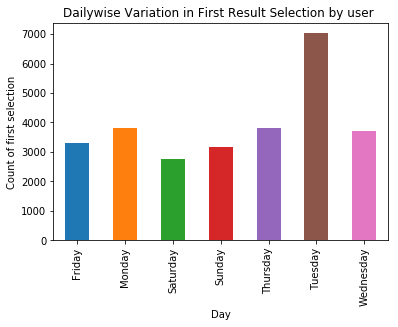

In [32]:
daywise_resultpos = d[d.n_results == 1].groupby(['day'])['n_results'].size().plot(kind = 'bar')
daywise_resultpos.set_xlabel("Day")
daywise_resultpos.set_ylabel("Count of first selection")
daywise_resultpos.set_title("Dailywise Variation in First Result Selection by user ")

## 3. What is their daily overall zero results rate? How does it vary between the groups?

In [39]:
d = data[data['n_results'] == 0]
zero_result = pd.DataFrame(d.groupby(['date', 'session_id'])['n_results'].size().reset_index()).rename(columns = {'n_results' : 'zero_results'})
all_result = pd.DataFrame(data.groupby(['date', 'session_id'])['n_results'].size().reset_index()).rename(columns = {'n_results' : 'all_results'})

In [40]:
result = pd.merge(zero_result, all_result, on=['date', 'session_id'])

In [43]:
result['zero_result_rate'] = result['zero_results']/result['all_results']*100
result.head()

,date,session_id,zero_results,all_results,zero_result_rate
0,2016-03-01,001a3950cd4ac6c6,4,5,80.0
1,2016-03-01,00429c6a475ab250,1,1,100.0
2,2016-03-01,00528f41689a87eb,2,2,100.0
3,2016-03-01,005522d0fb5a2b0a,1,5,20.0
4,2016-03-01,005febb3441161da,1,1,100.0


In [44]:
d = data[data['n_results'] == 0]
zero_result = pd.DataFrame(d.groupby(['date', 'session_id', 'group'])['n_results'].size().reset_index()).rename(columns = {'n_results' : 'zero_results'})
all_result = pd.DataFrame(data.groupby(['date', 'session_id', 'group'])['n_results'].size().reset_index()).rename(columns = {'n_results' : 'all_results'})

In [45]:
result = pd.merge(zero_result, all_result, on=['date', 'session_id', 'group'])

In [49]:
result['zero_result_rate'] = result['zero_results']/result['all_results']*100
result.groupby(['group'])['zero_result_rate'].mean()

group
a    45.350762
b    92.933896
Name: zero_result_rate, dtype: float64

## 4.	Let session length be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.

In [50]:
max_dt = pd.DataFrame(data.groupby(['date', 'session_id'])['timestamp'].max()).rename(columns = {'timestamp' : 'max_dt'})
min_dt = pd.DataFrame(data.groupby(['date', 'session_id'])['timestamp'].min()).rename(columns = {'timestamp' : 'min_dt'})

In [51]:
checkin = pd.DataFrame(data.groupby(['date', 'session_id'])['checkin'].sum())
session_df = pd.concat([max_dt, min_dt, checkin], axis=1, sort=False)

In [52]:
from datetime import timedelta
session_df['session_length'] = session_df['max_dt'] - session_df['min_dt']

In [53]:
session_df


max_dt              min_dt  checkin  \
date       session_id                                                          
2016-03-01 000936ae06d62383 2016-03-01 12:36:54 2016-03-01 12:36:54      0.0   
           001544bc03fac3e8 2016-03-01 11:36:18 2016-03-01 11:35:58      0.0   
           001a3950cd4ac6c6 2016-03-01 18:08:48 2016-03-01 18:08:06      0.0   
           001e2d0e159172d2 2016-03-01 00:43:35 2016-03-01 00:43:21     10.0   
           0022bba0634595b9 2016-03-01 03:37:39 2016-03-01 03:37:39      0.0   
           0024c4506bf92e1c 2016-03-01 07:02:28 2016-03-01 06:52:21   2700.0   
           0024f4f005f34c9d 2016-03-01 10:27:12 2016-03-01 10:25:17      0.0   
           002601319d1a02e1 2016-03-01 11:43:01 2016-03-01 11:43:01      0.0   
           0029420a5f8c7d90 2016-03-01 20:42:03 2016-03-01 20:41:46      0.0   
           002ad4609eedc350 2016-03-01 19:48:05 2016-03-01 19:48:05      0.0   
           002b97995ca9ce77 2016-03-01 06:58:29 2016-03-01 06:56:58     20.0   
           003037c8d3c3fe94 2016-03-01 13:30:07 2016-03-01 13:28:33     60.0   
           003f93d4791463c9 2016-03-01 11:23:52 2016-03-01 11:23:52      0.0   
           00429c6a475ab250 2016-03-01 17:18:28 2016-03-01 17:18:28      0.0   
           0044acabd5f6f179 2016-03-01 23:53:52 2016-03-01 23:53:27     30.0   
           00528f41689a87eb 2016-03-01 12:41:01 2016-03-01 12:40:21      0.0   
           005522d0fb5a2b0a 2016-03-01 08:28:57 2016-03-01 08:28:01      0.0   
           005febb3441161da 2016-03-01 17:04:18 2016-03-01 17:04:18      0.0   
           006504a6e17cd937 2016-03-01 16:36:39 2016-03-01 16:33:45      0.0   
           006dc4ea61a54213 2016-03-01 08:40:20 2016-03-01 08:40:20      0.0   
           00755fe48b066e95 2016-03-01 19:27:19 2016-03-01 19:26:00    150.0   
           00779edb937f57af 2016-03-01 18:00:39 2016-03-01 18:00:39      0.0   
           008a7074fa94c05c 2016-03-01 16:45:38 2016-03-01 16:38:33     10.0   
           008f0c9a837b399d 2016-03-01 12:04:12 2016-03-01 12:02:32    300.0   
           0093f0b5ae8e4ceb 2016-03-01 19:17:59 2016-03-01 19:10:51   2280.0   
           00961b898666d4ef 2016-03-01 13:54:54 2016-03-01 13:54:54      0.0   
           00985aca9ed9a8e8 2016-03-01 08:59:32 2016-03-01 08:59:32      0.0   
           009f85ff9e749ee9 2016-03-01 13:32:13 2016-03-01 13:32:13      0.0   
           00a060fe4c607df4 2016-03-01 16:24:03 2016-03-01 16:24:03      0.0   
           00b764358fa2b96a 2016-03-01 02:21:28 2016-03-01 02:21:28      0.0   
...                                         ...                 ...      ...   
2016-03-08 ff5c65d680935511 2016-03-08 16:10:19 2016-03-08 16:09:49      0.0   
           ff5e44a76d3d07cf 2016-03-08 02:40:24 2016-03-08 02:40:13      0.0   
           ff634e2192e1a9b5 2016-03-08 02:23:42 2016-03-08 02:23:00      0.0   
           ff6661598e76b950 2016-03-08 17:05:40 2016-03-08 17:05:40      0.0   
           ff704f81b3a295e4 2016-03-08 20:23:33 2016-03-08 20:22:49     60.0   
           ff731b76b7a54ada 2016-03-08 17:28:11 2016-03-08 17:28:11      0.0   
           ff7dfae55c771ea9 2016-03-08 10:08:49 2016-03-08 10:07:49      0.0   
           ff810b54386c28d9 2016-03-08 00:02:00 2016-03-08 00:02:00      0.0   
           ff8fdb513e1b4c51 2016-03-08 13:40:08 2016-03-08 13:38:32      0.0   
           ff90fbbdc2d33351 2016-03-08 09:18:39 2016-03-08 09:15:47      0.0   
           ff97099a41b39f77 2016-03-08 00:07:35 2016-03-08 00:07:35      0.0   
           ff9a5029d34afa8d 2016-03-08 17:38:37 2016-03-08 17:38:37      0.0   
           ffb09400502253e7 2016-03-08 13:07:05 2016-03-08 13:07:05      0.0   
           ffb35a1dfd2404db 2016-03-08 18:06:22 2016-03-08 18:04:44      0.0   
           ffb580658bdd9c45 2016-03-08 01:29:35 2016-03-08 01:29:35      0.0   
           ffb5b85824119c65 2016-03-08 16:09:57 2016-03-08 16:09:13     60.0   
           ffb7593c701f2e21 2016-03-08 14:12:06 2016-03-08 14:12:04      0.0   
           ffbb0bdb82fd9df2 2016-03-08 15

Text(0.5,1,'Relationship between Session length vs Checkin duration ')

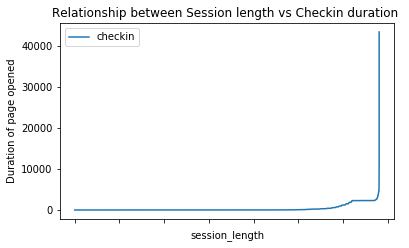

In [54]:
pt = session_df.sort_values('checkin').plot(x = 'session_length', y = 'checkin')
pt.set_xlabel("session_length")
pt.set_ylabel("Duration of page opened")
pt.set_title("Relationship between Session length vs Checkin duration ")

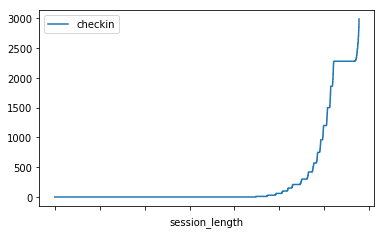

In [55]:
session_df[session_df['checkin'] < 3000].sort_values('checkin').plot(x = 'session_length', y = 'checkin')

In [67]:
import numpy as np

In [68]:
data['is_clicked'] = np.nan

In [85]:
data.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,day,date,is_clicked
0,00000736167c507e8ec225bd9e71f9e5,2016-03-01 10:38:42,78245c2c3fba013a,b,1,NaN,cbeb66d1bc1f1bc2,5.0,NaN,Tuesday,2016-03-01,NaN
1,00000c69fe345268935463abbfa5d5b3,2016-03-07 00:52:26,c559c3be98dca8a4,a,1,NaN,eb658e8722aad674,10.0,NaN,Monday,2016-03-07,NaN
2,00003bfdab715ee59077a3670331b787,2016-03-02 14:53:05,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN,Wednesday,2016-03-02,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2016-03-02 22:27:01,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0,Wednesday,2016-03-02,NaN
4,000050cbb4ef5b42b16c4d2cf69e6358,2016-03-02 09:50:23,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN,Wednesday,2016-03-02,NaN


In [81]:
data['is_clicked'].value_counts()

Series([], Name: is_clicked, dtype: int64)

0

In [83]:
data.loc[(data['action'] == 'searchResultPage') & (data['n_results'] > 0), 'is_clicked' ] = 1

In [84]:
data.loc[(data['action'] == 'searchResultPage') & (data['n_results'] == 0), 'is_clicked' ] = 0